In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats import power
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [213]:
df =pd.read_csv('train_2v.csv')
df.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0


DATA CLEANING

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
df.shape

(43400, 12)

In [6]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [194]:
df.fillna(df.bmi.mean())
df.head()
# 1462/43400 = 0.0337 ~ 3.37% bmi values are nan. 
# we decided to fill the nan with bmi. mean value because it won't change bmi distribution and it is also easier to navigate
# through the dataframe since all the columns have the same length.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [197]:
df.dropna(axis =0,inplace = True)
# drops all rows have less than or equal to n null values in the dataset
# expects to drop all null values in the dataframe df

In [198]:
df.isnull().sum()
# check the nan values status

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df = df[df.gender !='Other']
# forms a df with gender column without 'Other' values
# in another word we drop 'Other' values in genderb

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


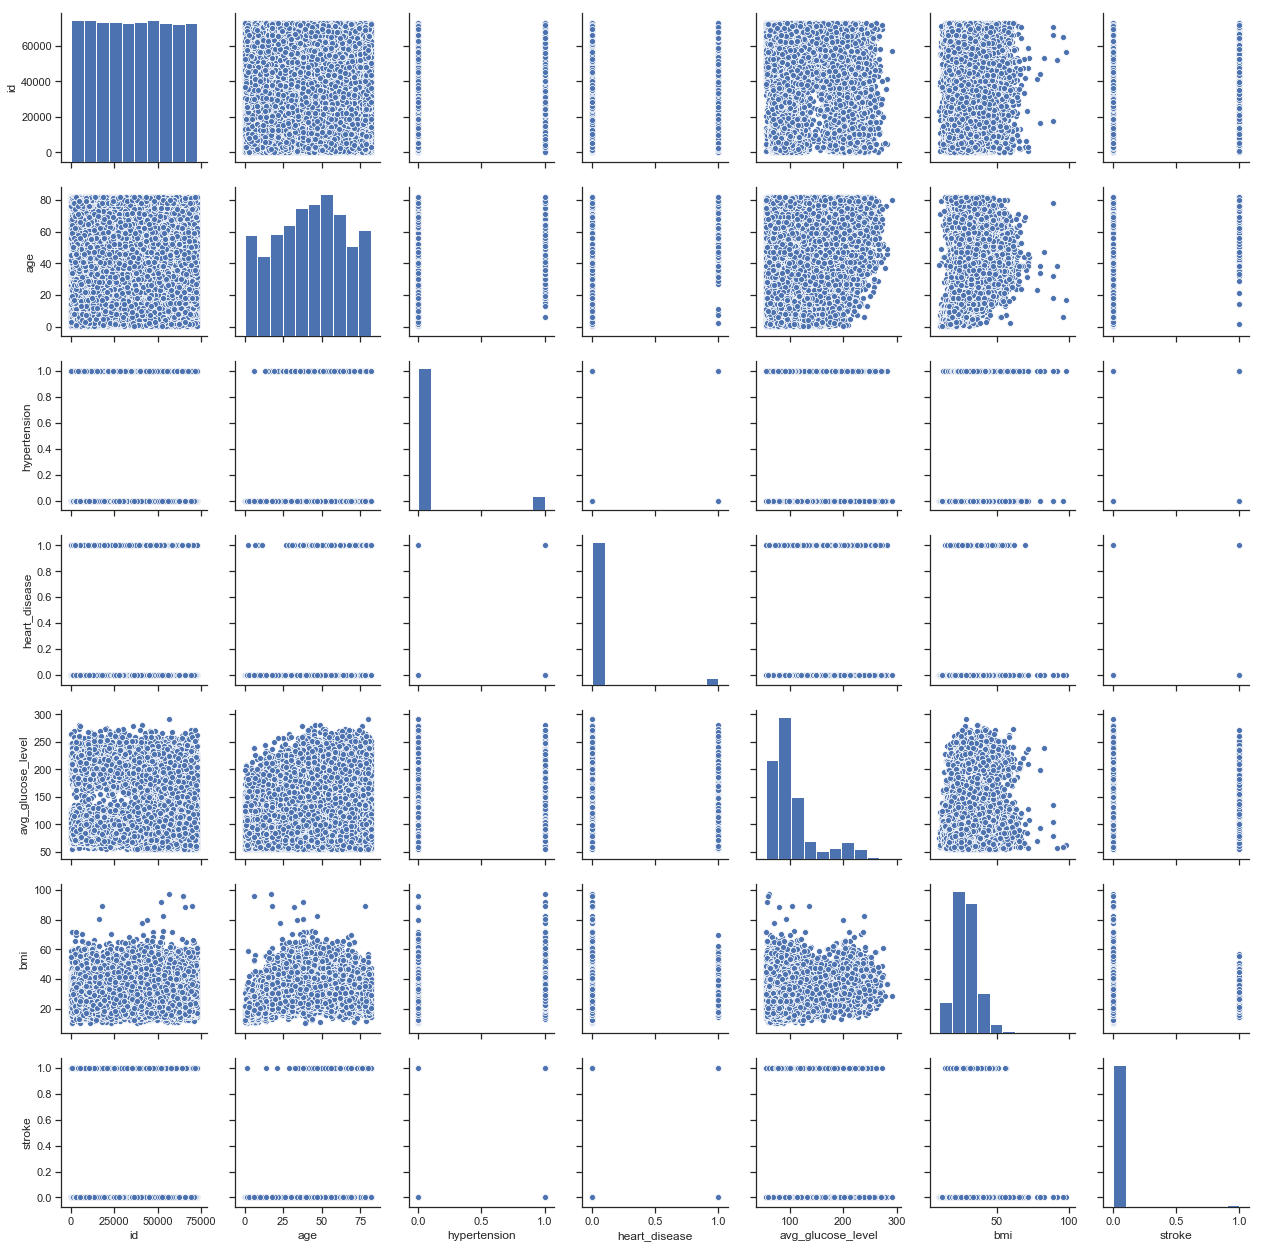

In [218]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)


IMPACT OF GENDER ON STROKE
Hypothesis:
    H_nod : mu_males_stroke = mu_female_stroke
    H_alt : mu_males_stroke != mu_female_stroke 
Statistic Methodology: ANOVA TESTS
ANOVA is used to prove/disprove if gender has impacts on having stroke.
ANOVA is validated under assumptions of normality, homogeneity of variance,independent observations are true.
We will check these assumptions with a linear models .

In [13]:
# find the number of male, female with and without stroke respectively:
num_female_stroke = len(df[(df['gender']== 'Female') & (df['stroke']==1)])
num_males_stroke = len(df[(df['gender']== 'Male') & (df['stroke']==1)])
num_female_no_stroke = len(df[(df['gender']== 'Female') & (df['stroke']== 0)])
num_males_no_stroke = len(df[(df['gender']== 'Male') & (df['stroke']==0)])
print(num_female_stroke,num_males_stroke, num_female_no_stroke,num_males_no_stroke)

313 235 17539 10978


In [14]:
# probability of male having stroke in a male population
p_males_stroke =num_males_stroke/(num_males_stroke+num_males_no_stroke) 
p_males_stroke

0.020957816819762776

In [15]:
# probability of a female having stroke in a female population
P_female_stroke = num_female_stroke/(num_female_stroke + num_female_no_stroke )
P_female_stroke

0.01753304951826126

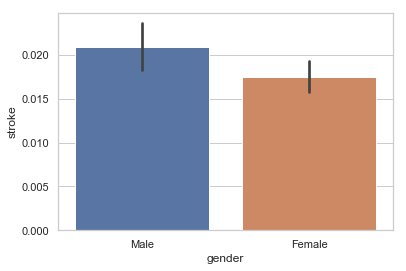

In [16]:
sns.set(style="whitegrid")
sns.barplot(x="gender",y="stroke",data=df)
# graph shows the probability of a male and female having stroke 
#  P(male_stroke) = 0.0199, and P(female_stroke) = 0.0168

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
df['stroke'].groupby(df['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,17852.0,0.017533,0.131250,0.0,0.0,0.0,0.0,1.0
Male,11213.0,0.020958,0.143249,0.0,0.0,0.0,0.0,1.0


In [19]:
stats.f_oneway(df['stroke'][df['gender']== 'Female'],
               df['stroke'][df['gender']== 'Male'])

F_onewayResult(statistic=4.367089959760808, pvalue=0.03664818381915759)

1)The F-statistic = 5.565 and the p-value = 0.018 indicating that there is an significant effect of gender on stroke.But we don't know where the diffrence is. 
2)We create our model using: formula = Contrl_col +C(gender)
where our control attribute is stroke and gender is a factor in having stroke.

In [20]:
# Generating the ANOVA Table in order to analyze the influence of gender on stroke
formula = 'stroke~C(gender) '
lm = ols(formula,df).fit()
aov_table = sm.stats.anova_lm(lm,typ=2)
print(aov_table)

               sum_sq       df        F    PR(>F)
C(gender)    0.080779      1.0  4.36709  0.036648
Residual   537.587069  29063.0      NaN       NaN


If the null hypothesis is true, we expect F to have a value close to 1.0 most of the time. F = 2.88 meaning that the variation among males and female group are as we expected
Note that the assumptions apply to the residuals and not the variables. ANOVA is validate if assumptions include: Normality, homogeneity of variance, and independent observation are true.We will check these assumptions with the linear models below.

In [21]:
lm = ols(formula,df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.367
Date:                Sun, 04 Aug 2019   Prob (F-statistic):             0.0366
Time:                        18:54:24   Log-Likelihood:                 16746.
No. Observations:               29065   AIC:                        -3.349e+04
Df Residuals:                   29063   BIC:                        -3.347e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0175      0.001     17.225      0.000       0.016       0.020
C(gender)[T.Male]     0.0034      0.002      2.090      0.037       0.000       0.007
==============================================================================
Omnibus:                    35879.755   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3037634.240
Skew:                           7.074   Prob(JB):                         0.00
Kurtosis:                      51.043   Cond. No.                         2.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:
Jarque-Bera(JB,Prob(jb) is p-value and p-value = 0  . JB tests the assumption of normality
Omnibus(Prob(omnibus) is p-value and p- value = 0   . Omnibus tests the assumption of homogeneity of variance
Durbin -Watson tests  = 2.003 . Durbin-Watson tests is to detect the presence of autocorrelation.
All the assumptions are true, and the F value is greater than 1. We can reject our null hypothesis. 
Indeed, gender has impact on having stroke.

EFFECT of BMI on HEART DISEASE
Hypothesis:
    H_nod : mu_bmi_given_heart_disease = mu_bmi_given_no_heart_disease
    H_alt : mu_bmi_given_heart_disease != mu_bmi_given_no_heart_disease
Statistic Methodology: Welch's T-Test
Welch's T-Test is used is used to test the hypothesis that two populations have equal means.


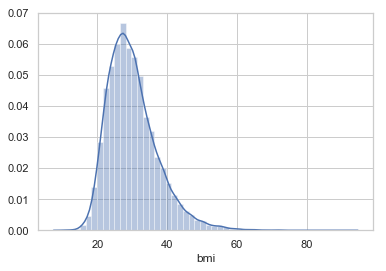

In [23]:
# plot distribution of bmi of the whole population
sns.distplot(df.bmi)

In [37]:
# create a bmi df with 2 features: bmi and heart disease
bmi = df[['bmi','heart_disease']]

,bmi,heart_disease
1,39.2,0
3,35.9,0
6,17.7,0
7,27.0,1
8,32.3,0


Text(0, 0.5, 'Frequency Density')

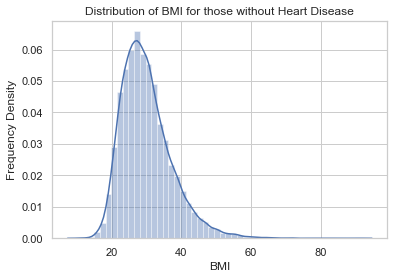

In [107]:
# create new dataframe bmi0 where the values of bmi are associated with heart_disease = 0
bmi0 = bmi[bmi['heart_disease']==0] 
#plot bmi of those who don't have heart disease
sns.distplot(bmi0.bmi)
plt.title('Distribution of BMI for those without Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frequency Density')

In [114]:
(bmi0).mean()

bmi              30.016309
heart_disease     0.000000
dtype: float64

Text(0, 0.5, 'Frequency Density')

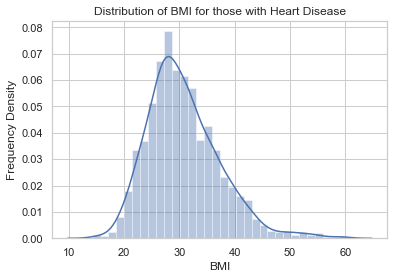

In [108]:
#create new dataframe bmi1 where the values of bmi are associated with heart_disease = 1
bmi1 = bmi[bmi['heart_disease']==1]
# plot bmi distribution of those who have heart disease
sns.distplot(bmi1.bmi)
plt.title('Distribution of BMI for those with Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frequency Density')

In [171]:
print((np.mean(bmi0.bmi)),(np.mean(bmi1.bmi)))

30.01630912192811 30.752044854881326


In [172]:
 #"Calculate Welch's t statistic for two samples."
def welch_t(a, b):
    top = a.mean() - b.mean()
    bottom = np.sqrt(a.var(ddof =1)/a.size + b.var(ddof =1)/b.size)
    return np.abs(top/bottom)
    #Return the t-score!

welch_t(bmi0.bmi,bmi1.bmi)

4.2389983607707835

In [173]:
#Calculate the effective degrees of freedom for two samples: bmi of those with and without heart disease
def welch_df(a, b):
    s1 = a.var(ddof =1)
    N1 = a.size
    s2 = b.var(ddof=1)
    N2 = b.size
    v_top = (s1/N1 +s2/N2)**2
    v_bottom = (((s1/N1)**2/(N1 -1)) + (s2/N2)**2/(N2 -1))
    v = v_top/v_bottom
#Return the degrees of freedom
    return v 

welch_df(bmi0.bmi, bmi1.bmi)

1724.8611094849746

In [174]:
t = welch_t(bmi0.bmi,bmi1.bmi)
df = welch_df(bmi0.bmi,bmi1.bmi)
print(t,df)

4.2389983607707835 1724.8611094849746


In [175]:
p = 1 -stats.t.cdf(t,df)
print(p)

1.1819948171121197e-05


In [162]:
# define a summative function p_val_welch(a, b, two_sided=False)
#which takes in two samples a and b, as well as an optional binary variable to allow 
# toggling between a one and two-sided Welch's  tt -test.
def p_value(a, b, two_sided=False):
    t = welch_t(a,b)
    df = welch_df(a,b)
    p = 1-stats.t.cdf(np.abs(t),df)
    if two_sided:
        return 2*p
    else:
        return p

In [176]:
p_value(bmi0.bmi,bmi1.bmi)

1.1819948171121197e-05

In [177]:
p_value(bmi0.bmi, bmi1.bmi, two_sided=True)

2.3639896342242395e-05

Text(0, 0.5, 'Frequency Density')

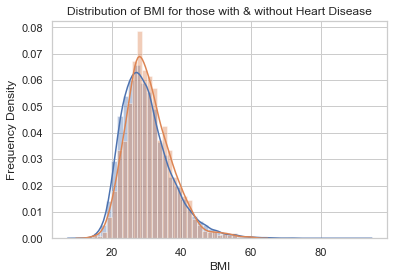

In [178]:
# plot bmi distribution of 2 populations: those don't and have heart disease
sns.distplot(bmi0.bmi)
sns.distplot(bmi1.bmi)
plt.title('Distribution of BMI for those with & without Heart Disease')
plt.xlabel('BMI')
plt.ylabel('Frequency Density')

Conclusion: The p-value = 2.37 *e**-5 is very low <1%, we reject our null hypothesis
BMI indeed has an impact on having heart disease on people.

IMPACT OF HYPERTENSION ON STROKE


In [203]:
df.hypertension.value_counts()

0    25831
1     3241
Name: hypertension, dtype: int64

In [204]:
df.stroke.value_counts()

0    28524
1      548
Name: stroke, dtype: int64

In [199]:
df.groupby(['hypertension']).sum()

,id,age,heart_disease,avg_glucose_level,bmi,stroke
hypertension,,,,,,
0,957250005,1187259.0,1107,2684690.40,767819.0,389
1,120724331,198654.0,409,408664.15,105915.7,159


In [202]:
df.groupby(['hypertension']).count()

,id,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
hypertension,,,,,,,,,,,
0,25831,25831,25831,25831,25831,25831,25831,25831,25831,25831,25831
1,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241


In [207]:
df_hypertension_stroke = df[['hypertension', 'stroke']]
df_hypertension_stroke.head()

,hypertension,stroke
1,1,0
3,0,0
6,0,0
7,0,0
8,0,0


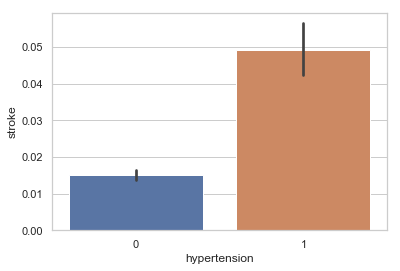

In [210]:
sns.set(style="whitegrid")
sns.barplot(x="hypertension",y="stroke",data=df)